# Detection and Classification of Chronic Kidney Disease

Chronic kidney disease (CKD), also known as chronic renal disease, is progressive loss in kidney function over a period of months or years [1]. If kidney disease gets worse, wastes can build to high levels in your blood and make you feel sick. Patient may develop complications like high blood pressure, anemia (low blood count), weak bones, poor nutritional health and nerve damage. Also, kidney disease increases your risk of having heart and blood vessel disease. These problems may happen slowly over a long period of time.[2]

In this project,Chronic Kidney Disease dataset in UCI Machine learning repository [3] have been explored, which includes 24 attributes excluding the target label class and health parameters of 400 patients

In [1]:
!pip install cython

In [2]:
!pip install git+https://github.com/scikit-learn/scikit-learn.git

  Cloning https://github.com/scikit-learn/scikit-learn.git to /gpfs/global_fs01/sym_shared/YPProdSpark/user/saee-2acaee859fdc10-536547fd2c66/notebook/tmp/pip-RB5MV5-build
  Running setup.py install for scikit-learn ... done


## Knowing the data

In [3]:
# The code was removed by DSX for sharing.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
import pandas as pd
import numpy as np
from IPython.display import display
from scipy.stats import mode
import matplotlib.pyplot as plt
print "Attribute list is {}".format(data.columns.values)

print (" ")
#No of people with chronic kidney disease
n_ckd = len(data[data['class']=='ckd'])

#No of people without chronic kidney disease
n_notckd = len(data[data['class']=='notckd'])

print " "

print "Number of people detected with chronic kidney disease: {}".format(n_ckd)
print "Number of people not detected with chronic kidney diesease: {}".format(n_notckd)
display(data.describe())

Attribute list is ['age' 'bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc' 'sod'
 'pot' 'hemo' 'pcv' 'wbcc' 'rbcc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'class']
 
 
Number of people detected with chronic kidney disease: 222
Number of people not detected with chronic kidney diesease: 140


,age,bp,sc
count,362.000000,362.000000,362.000000
mean,52.533149,76.574586,3.086878
std,16.211389,13.920280,5.850821
min,5.000000,50.000000,0.400000
25%,43.000000,70.000000,0.900000
50%,55.000000,80.000000,1.300000
75%,65.000000,80.000000,2.800000
max,90.000000,180.000000,76.000000


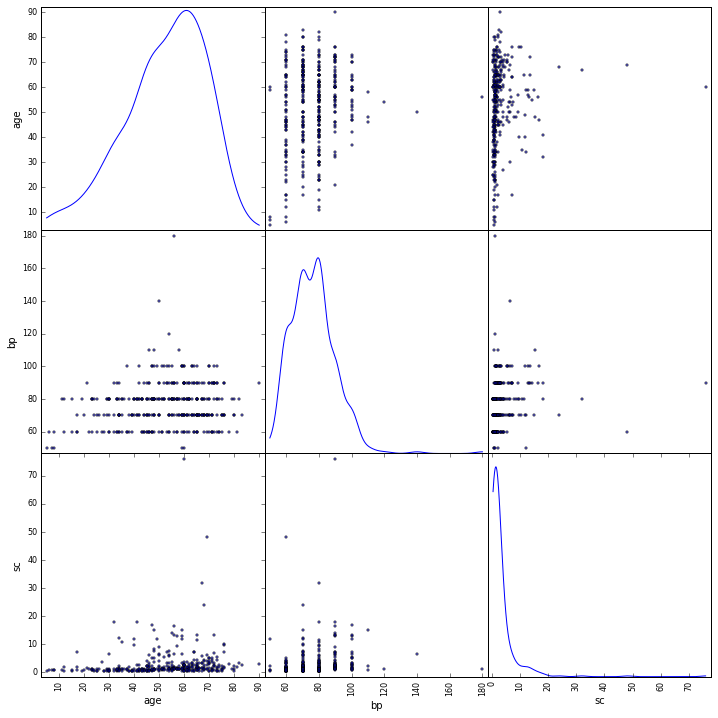

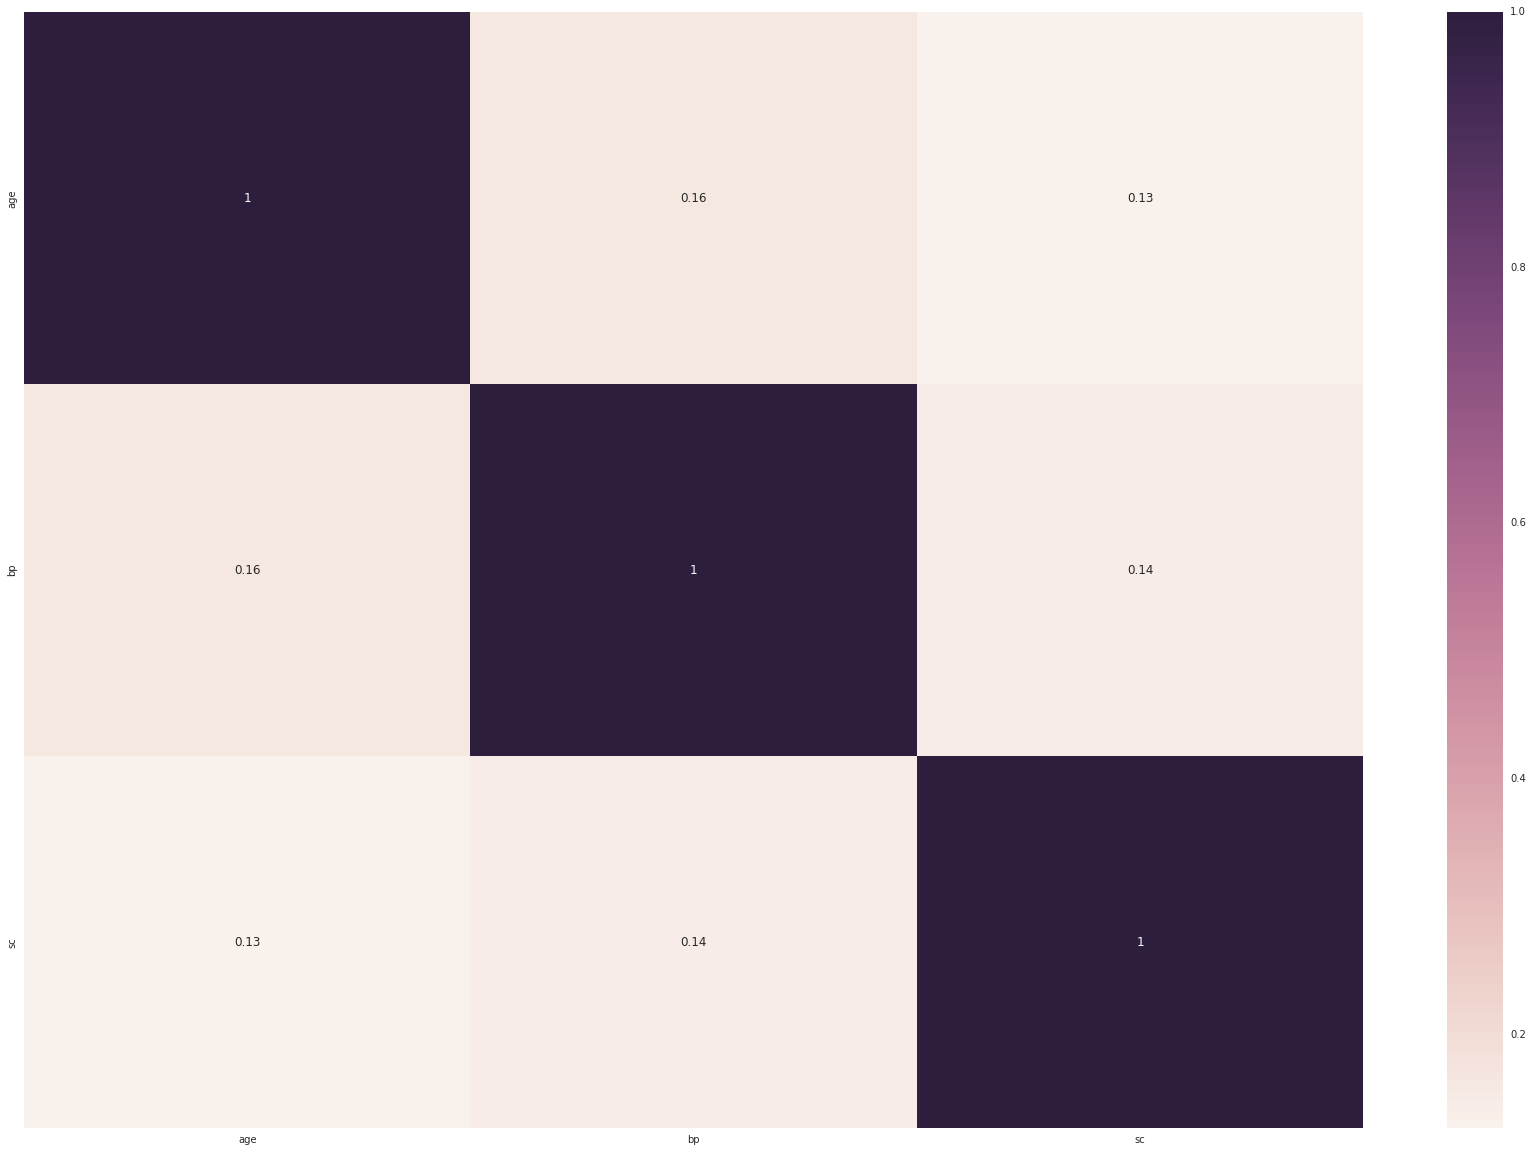

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.6, figsize=(12, 12), diagonal='kde')
plt.show()

import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

We have 24 feature attributes with 11 numerical attributes and 14 nominal and one target label.The number of people detected with chronic kidney disease(ckd) is 250 and with no-ckd is 150. In the scatter plot, hemo,pcv and rbcc shows high positive correlation.

Handling the Missing values

In [6]:
#Filling missing value with most frequent for nominal and median for numerical

X = pd.DataFrame(data)
fill = pd.Series([X[c].value_counts().index[0]
        if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
        index=X.columns)
new_data=X.fillna(fill) 
print new_data            

     age   bp     sg al su       rbc        pc         pcc          ba  bgr  \
0     48   80   1.02  1  0         ?    normal  notpresent  notpresent  121   
1      7   50   1.02  4  0         ?    normal  notpresent  notpresent    ?   
2     62   80   1.01  2  3    normal    normal  notpresent  notpresent  423   
3     48   70  1.005  4  0    normal  abnormal     present  notpresent  117   
4     51   80   1.01  2  0    normal    normal  notpresent  notpresent  106   
5     60   90  1.015  3  0         ?         ?  notpresent  notpresent   74   
6     68   70   1.01  0  0         ?    normal  notpresent  notpresent  100   
7     52  100  1.015  3  0    normal  abnormal     present  notpresent  138   
8     53   90   1.02  2  0  abnormal  abnormal     present  notpresent   70   
9     50   60   1.01  2  4         ?  abnormal     present  notpresent  490   
10    63   70   1.01  3  0  abnormal  abnormal     present  notpresent  380   
11    68   70  1.015  3  1         ?    normal     p

Label Encoding on the nominal values

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data=new_data.copy()
for items in data:
    if data[items].dtype == np.dtype('O'):
        data[items]=le.fit_transform(data[items])

print data.dtypes
print data

age        int64
bp         int64
sg         int64
al         int64
su         int64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr        int64
bu         int64
sc       float64
sod        int64
pot        int64
hemo       int64
pcv        int64
wbcc       int64
rbcc       int64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object
     age   bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...    pcv  wbcc  rbcc  htn  \
0     48   80   3   1   0    0   2    1   1   20  ...     29    67    30    1   
1      7   50   3   4   0    0   2    1   1  141  ...     23    51    45    0   
2     62   80   1   2   3    2   2    1   1  110  ...     16    65    45    0   
3     48   70   0   4   0    2   1    2   1   16  ...     17    57    17    1   
4     51   80   1   2   0    2   2    1   1    6  ...     20    63    24    0   
5     60   90   2   3   0    0   0    1   1  116  ...     24    67    22   

Scaling features using Robust Scaler 

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler
target_class = data['class']
features = data.drop('class', axis = 1)
data_robust = pd.DataFrame(RobustScaler().fit_transform(features), columns=features.columns)


Dimensionality Reduction

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pd.DataFrame(pca.fit_transform(data_robust), columns=data_robust.columns)
print data_robust.shape
print pca.explained_variance_ratio_


(362, 24)
[ 0.465855    0.19887623  0.0868326   0.0431744   0.03423298  0.02504272
  0.02193176  0.01967169  0.0148559   0.01261892  0.0116054   0.00947037
  0.00859194  0.00723695  0.0066376   0.00611437  0.00477829  0.00463891
  0.00379677  0.00363231  0.00331801  0.00293129  0.00225673  0.00189886]


First 11 components gives principal components that explain at least 95% of total variance. So let the number of components be 11.

In [10]:
pca = PCA(n_components=11)
pca.fit(data_robust)
reduced_data = pca.transform(data_robust)
reduced_data = pd.DataFrame(reduced_data, columns = ['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11'])
print reduced_data.head()

       dim1      dim2      dim3      dim4      dim5      dim6      dim7  \
0 -1.272895  0.507076  0.623917 -0.070021 -1.215594  0.670972 -0.074926   
1 -1.816851  0.894008 -2.520573 -0.643878 -0.215663  2.088594  0.199919   
2  0.054053 -1.881968  0.388131  0.377112 -1.239310  0.778536 -0.077761   
3  0.146368  1.146024 -0.064633  2.389408  1.502282 -0.923893 -0.674478   
4 -1.264087  0.913358  0.655393  0.001043 -0.887293  1.091559  0.215299   

       dim8      dim9     dim10     dim11  
0  0.041320 -0.245751 -0.045646 -0.583145  
1  1.499605  0.180244 -0.785395  0.001923  
2  0.342669  0.622664  1.048398 -0.749171  
3  1.068070  0.121879 -0.633857 -0.042176  
4 -0.143879 -0.000402 -0.515735 -0.727559  


Splitting the dataset to training and testing set

In [11]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_data,target_class, test_size=0.25, random_state=42)



/gpfs/fs01/user/saee-2acaee859fdc10-536547fd2c66/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The Six Classifiers without hypertuning parameters

In [12]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from time import time
clf_A=GaussianNB()
clf_B=tree.DecisionTreeClassifier(random_state=0)
clf_C=SVC()
clf_D=RandomForestClassifier()
clf_E=KNeighborsClassifier()
clf_F=MLPClassifier(random_state=1)

for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    
    print "\n{}: \n".format(clf.__class__.__name__)
    start = time()
  
    clf.fit(X_train, y_train)
    
    end = time()
    print "Trained model in {:.4f} milliseconds".format((end - start)*1000)
    
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    y_pred = clf.predict(X_test)
    f1_scorer=f1_score(y_test, y_pred, pos_label=0)
    print "\n{}: \n".format(clf.__class__.__name__)
    print "f1 score for test test is {}".format(f1_scorer)



GaussianNB: 

Trained model in 1.2679 milliseconds

DecisionTreeClassifier: 

Trained model in 1.8921 milliseconds

SVC: 

Trained model in 2.0971 milliseconds

RandomForestClassifier: 

Trained model in 29.2242 milliseconds

KNeighborsClassifier: 

Trained model in 0.9260 milliseconds

MLPClassifier: 



/gpfs/fs01/user/saee-2acaee859fdc10-536547fd2c66/.local/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Trained model in 427.0518 milliseconds

GaussianNB: 

f1 score for test test is 0.962962962963

DecisionTreeClassifier: 

f1 score for test test is 0.964912280702

SVC: 

f1 score for test test is 0.981818181818

RandomForestClassifier: 

f1 score for test test is 0.948275862069

KNeighborsClassifier: 

f1 score for test test is 0.933333333333

MLPClassifier: 

f1 score for test test is 0.97247706422


/gpfs/fs01/user/saee-2acaee859fdc10-536547fd2c66/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


| Classifier        | Training Time (ms)         | F1 Score  |
| ------------------|:--------------------------:| ---------:|
| Gaussian NB       | 0.0000                     | 0.96      |
| Decision Tree     | 0.0000                     | 0.9545    |
| SVC               | 15.0001                    | 0.9843    |
| Random Forest     | 46.9999                    | 0.9767    |
| KNN               | 0.000                      | 0.9922    |
| MLP               | 375.9999                   | 0.9922    |

Classifiers with hypertuning

In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


parameters = [{'kernel':['rbf','sigmoid'],'C': [.1,1,10], 'gamma': [0.001,10,1000]},]
clf = SVC()
f1_scorer = make_scorer(f1_score,pos_label=0)
sss = StratifiedShuffleSplit( y_train, n_iter=10, test_size=0.25)
grid_obj = GridSearchCV(clf,parameters,cv = sss,scoring=f1_scorer)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
#print clf
y_pred = clf.predict(X_test)
f1_score_value=f1_score(y_test, y_pred, pos_label=0) # For testing
print "F1 Score for test set: {}".format(f1_score_value)
print "Confusion Matrix is : \n  {} ".format(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1']
print " "
print "Classification report is : \n  "
print(classification_report(y_test, y_pred, target_names=target_names))

        

F1 Score for test set: 0.943396226415
Confusion Matrix is : 
  [[50  5]
 [ 1 35]] 
 
Classification report is : 
  
             precision    recall  f1-score   support

    class 0       0.98      0.91      0.94        55
    class 1       0.88      0.97      0.92        36

avg / total       0.94      0.93      0.93        91



Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
parameters = [{'n_estimators': [10,50,75],
               'max_features': ["auto","sqrt","log2"],'n_jobs': [1]}]
clf = RandomForestClassifier()
f1_scorer = make_scorer(f1_score,pos_label=0)
sss = StratifiedShuffleSplit( y_train, n_iter=10, test_size=0.25)
grid_obj = GridSearchCV(clf,parameters,cv = sss,scoring=f1_scorer)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
y_pred = clf.predict(X_test)
f1_score_value=f1_score(y_test, y_pred, pos_label=0) # For testing
print "F1 Score for test set: {}".format(f1_score_value)
print "Confusion Matrix is : \n  {} ".format(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1']
print " "
print "Classification report is : \n  "
print(classification_report(y_test, y_pred, target_names=target_names))

F1 Score for test set: 0.981818181818
Confusion Matrix is : 
  [[54  1]
 [ 1 35]] 
 
Classification report is : 
  
             precision    recall  f1-score   support

    class 0       0.98      0.98      0.98        55
    class 1       0.97      0.97      0.97        36

avg / total       0.98      0.98      0.98        91



KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
parameters = [{'metric':['minkowski','euclidean'] ,
               'weights':['uniform'],'n_neighbors': [5,15,10]}]
clf = KNeighborsClassifier()
f1_scorer = make_scorer(f1_score,pos_label=0)
sss = StratifiedShuffleSplit( y_train, n_iter=10, test_size=0.25)
grid_obj = GridSearchCV(clf,parameters,cv = sss,scoring=f1_scorer)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
print clf
y_pred = clf.predict(X_test)
f1_score_value=f1_score(y_test, y_pred, pos_label=0) # For testing
print "F1 Score for test set: {}".format(f1_score_value)
print "Confusion Matrix is : \n  {} ".format(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1']
print " "
print "Classification report is : \n  "
print(classification_report(y_test, y_pred, target_names=target_names))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
F1 Score for test set: 0.933333333333
Confusion Matrix is : 
  [[49  6]
 [ 1 35]] 
 
Classification report is : 
  
             precision    recall  f1-score   support

    class 0       0.98      0.89      0.93        55
    class 1       0.85      0.97      0.91        36

avg / total       0.93      0.92      0.92        91



Decision Tree

In [16]:
from sklearn import tree
from sklearn.metrics import classification_report
parameters = [{'criterion':['entropy','gini'] ,'splitter':['best','random']}]
clf = tree.DecisionTreeClassifier(random_state=0)
f1_scorer = make_scorer(f1_score,pos_label=0)
sss = StratifiedShuffleSplit( y_train, n_iter=10, test_size=0.25)
grid_obj = GridSearchCV(clf,parameters,cv = sss,scoring=f1_scorer)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
y_pred = clf.predict(X_test)
f1_score_value=f1_score(y_test, y_pred, pos_label=0) # For testing
print "F1 Score for test set: {}".format(f1_score_value)
print "Confusion Matrix is : \n  {} ".format(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1']
print " "
print "Classification report is : \n  "
print(classification_report(y_test, y_pred, target_names=target_names))

F1 Score for test set: 0.888888888889
Confusion Matrix is : 
  [[48  7]
 [ 5 31]] 
 
Classification report is : 
  
             precision    recall  f1-score   support

    class 0       0.91      0.87      0.89        55
    class 1       0.82      0.86      0.84        36

avg / total       0.87      0.87      0.87        91



In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
parameters = [{'solver':['lbfgs','sgd'],'alpha':[1e-6,1e-3],'hidden_layer_sizes':[3,6], }]
clf = MLPClassifier(random_state=42)
f1_scorer = make_scorer(f1_score,pos_label=0)
sss = StratifiedShuffleSplit( y_train, n_iter=10, test_size=0.25)
grid_obj = GridSearchCV(clf,parameters,cv = sss,scoring=f1_scorer)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
y_pred = clf.predict(X_test)
f1_score_value=f1_score(y_test, y_pred, pos_label=0) # For testing
print "F1 Score for test set: {}".format(f1_score_value)
print "Confusion Matrix is : \n  {} ".format(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1']
print " "
print "Classification report is : \n  "
print(classification_report(y_test, y_pred, target_names=target_names))



F1 Score for test set: 0.981818181818
Confusion Matrix is : 
  [[54  1]
 [ 1 35]] 
 
Classification report is : 
  
             precision    recall  f1-score   support

    class 0       0.98      0.98      0.98        55
    class 1       0.97      0.97      0.97        36

avg / total       0.98      0.98      0.98        91



In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

f1_score_value=f1_score(y_test, y_pred, pos_label=0) # For testing
print "F1 Score for test set: {}".format(f1_score_value)
print "Confusion Matrix is : \n  {} ".format(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1']
print " "
print "Classification report is : \n  "
print(classification_report(y_test, y_pred, target_names=target_names))


F1 Score for test set: 0.962962962963
Confusion Matrix is : 
  [[52  3]
 [ 1 35]] 
 
Classification report is : 
  
             precision    recall  f1-score   support

    class 0       0.98      0.95      0.96        55
    class 1       0.92      0.97      0.95        36

avg / total       0.96      0.96      0.96        91



With Naive Bayes(NB) as a benchmark of evaluation with F1 score of NB being 0.96, KNN outperforms NB with 0.99 with and without hypertuning and completing the training in less time.ANN also outperforms NB in terms of F1 score but it takes much training time even without hypertuning compared to others.Decision Tree shows an increase in performance with parameter optimization.
So comparing to the benchmark NB, all classifiers performs well but KNN performs really well with better accuracy and less time as medical diagnostic systems must give high performance and accuracy.



References:
    
    [1] https://en.wikipedia.org/wiki/Chronic_kidney_disease
    [2] https://www.kidney.org/kidneydisease/aboutckd
    [3]  L. Rubini, “Early stage of chronic kidney disease UCI machine learning repository,” 2015. [Online]. Available:           http://archive.ics.uci.edu/ml/datasets/Chronic Kidney Disease 
    [4] http://www.worldkidneyday.org/faqs/chronic-kidney-disease/
    [5] http://scikit-learn.org/stable/modules/model_evaluation.html
    [6] K.M. Al-Aidaroos, A.A. Bakar and Z. Othman ,Medical Data Classification with Naive Bayes Approach

   